In [34]:
import numpy as np 
import pandas as pd 

In [35]:
import pandas as pd
df = pd.read_csv("https://www.dropbox.com/s/5saczr8wmjketen/DiamondPrices.csv?dl=1")

In [36]:
df.head()

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
df.tail()

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [38]:
df.shape

(53940, 11)

In [39]:
df = df.drop(['sn'],axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [41]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [42]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

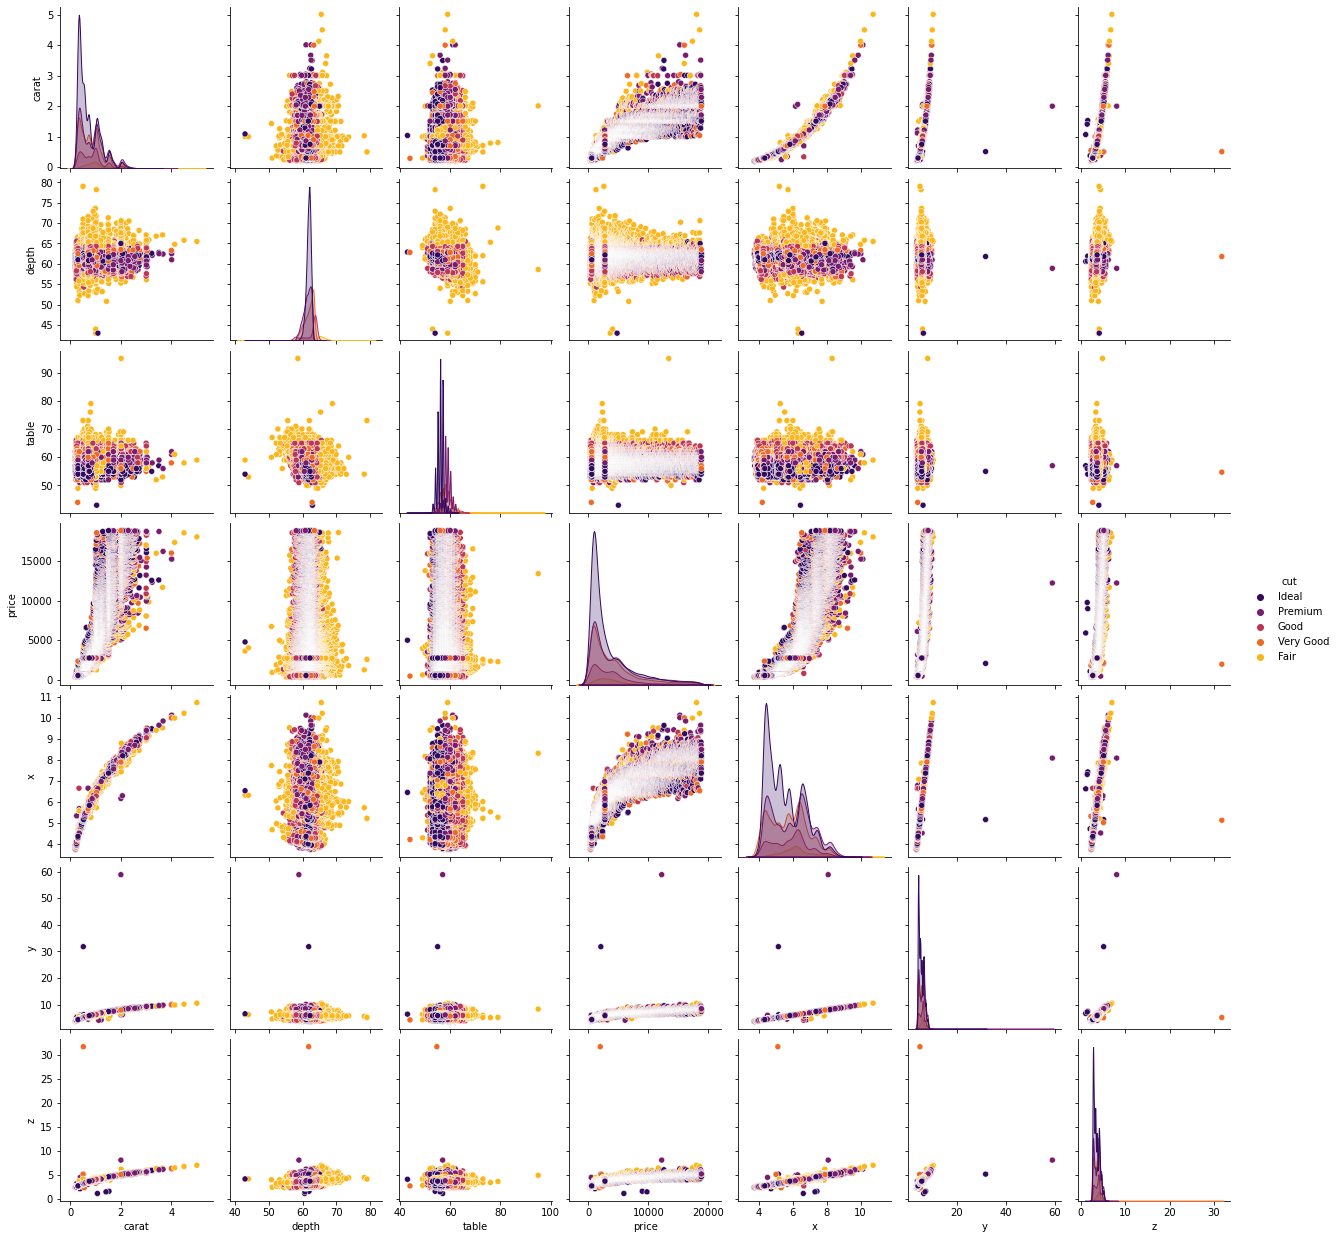

In [43]:
import seaborn as sns
pp = sns.pairplot(df,hue = "cut",palette='inferno')

Text(0.5, 1.0, "Regression  line  on  price  vs  'table'")

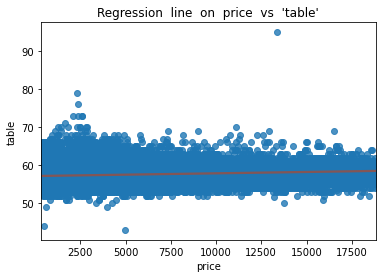

In [44]:
pp = sns.regplot(x="price" , y="table" , data=df , line_kws = {"color":"#835656"})
pp.set_title("Regression  line  on  price  vs  'table'")

Text(0.5, 1.0, "Regression  line  on  price  vs  'y'")

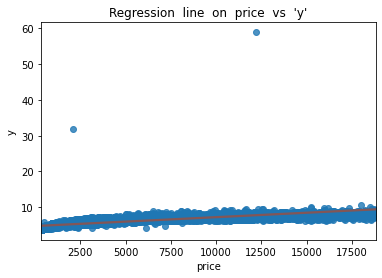

In [45]:
pp = sns.regplot(x="price" , y="y" , data=df , line_kws = {"color":"#835656"})
pp.set_title("Regression  line  on  price  vs  'y'")

Text(0.5, 1.0, "Regression  line  on  price  vs  'z'")

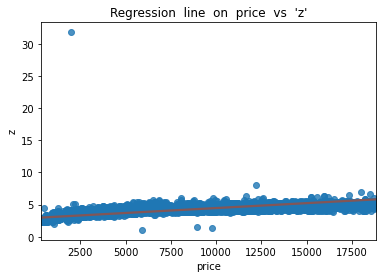

In [46]:
pp = sns.regplot(x="price" , y="z" , data=df , line_kws = {"color":"#835656"})
pp.set_title("Regression  line  on  price  vs  'z'")

Text(0.5, 1.0, "Regression  line  on  price  vs  'depth'")

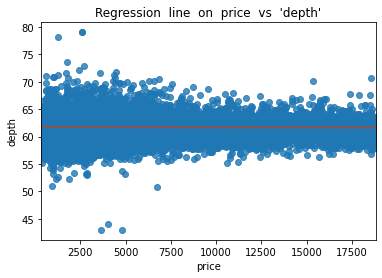

In [47]:
pp = sns.regplot(x="price" , y="depth" , data=df , line_kws = {"color":"#835656"})
pp.set_title("Regression  line  on  price  vs  'depth'")

Text(0.5, 1.0, "Regression  line  on  price  vs  'x'")

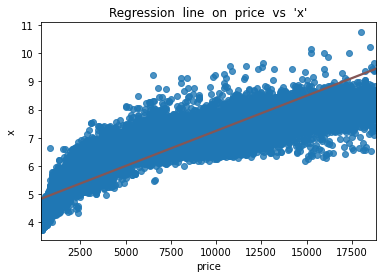

In [48]:
pp = sns.regplot(x="price" , y="x" , data=df , line_kws = {"color":"#835656"})
pp.set_title("Regression  line  on  price  vs  'x'")

In [49]:
df = df[(df["y"]<20)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df['z']<15)&(df['z']>2)]
df = df[(df['depth']<75)&(df['depth']>45)]

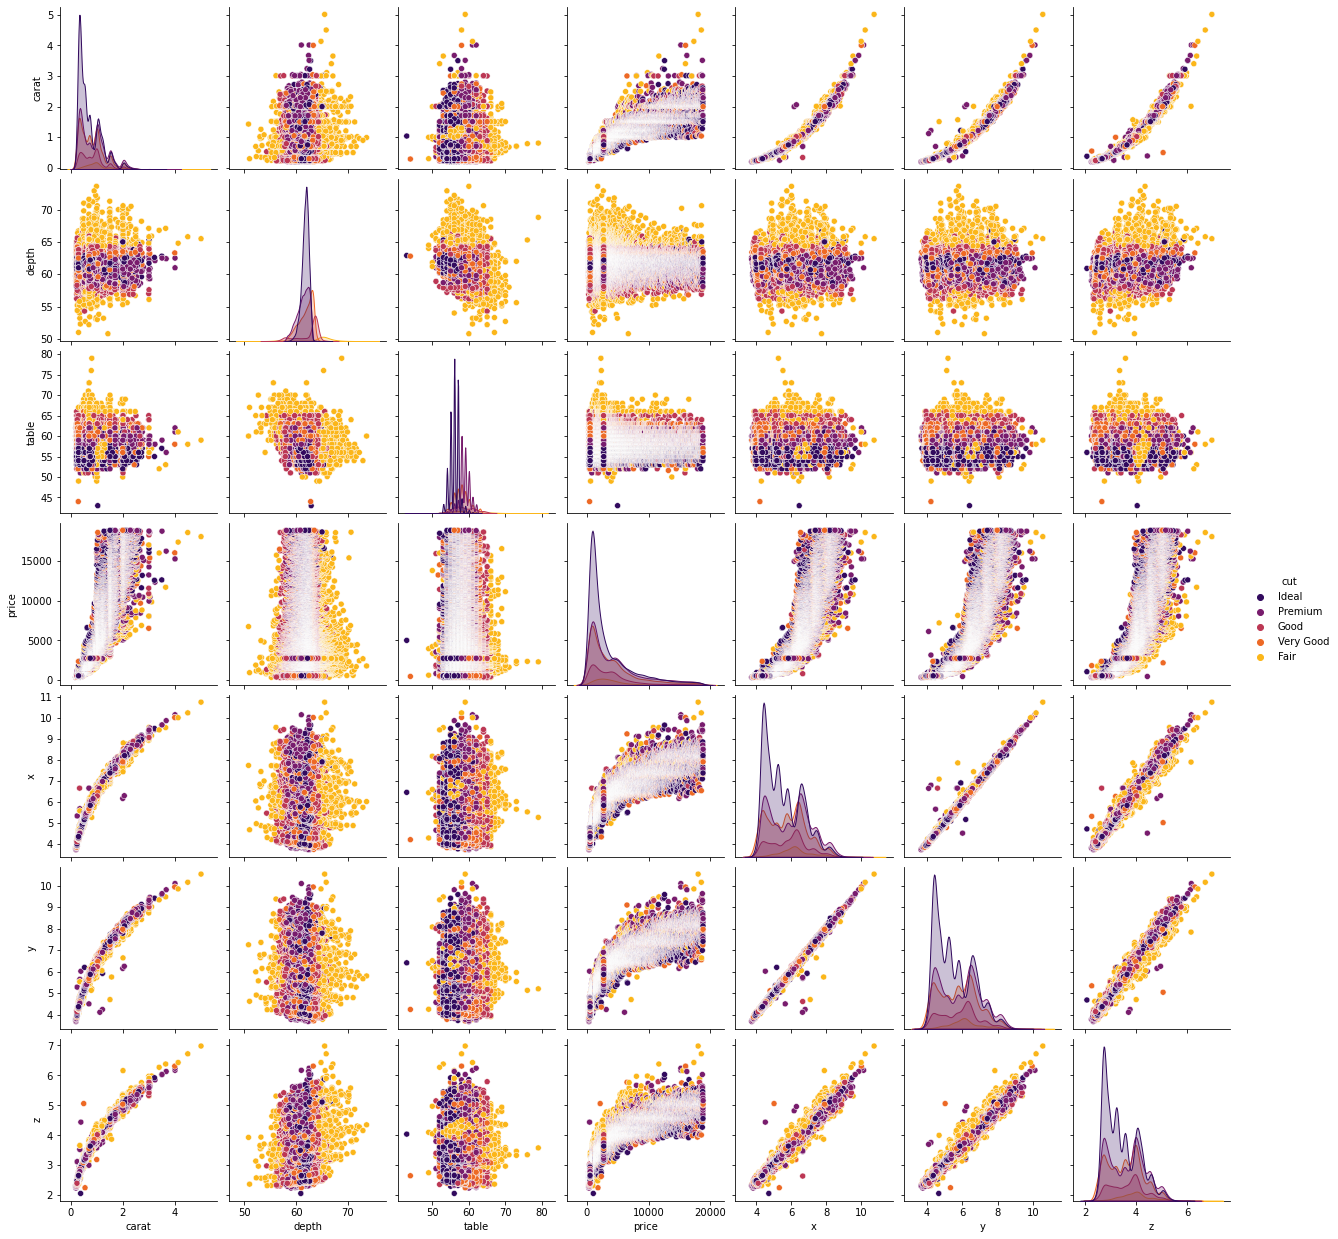

In [50]:
pp = sns.pairplot(df,hue = "cut",palette='inferno')

In [51]:
de= df.copy()

In [52]:
ob =  (df.dtypes == 'object')
ol = list(ob[ob].index)

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for columns in ol:
    de[columns]=label_encoder.fit_transform(de[columns])


In [54]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [55]:
de.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31


In [56]:
x= de.drop(["price"],axis =1)
y= de["price"]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= .2 ,random_state = 36946)

In [58]:
x_train.shape

(43125, 9)

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [60]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)


dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

rr = RandomForestRegressor()
rr.fit(x_train,y_train)

lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [61]:
y_pred1 = lr.predict(x_test)
y_pred2 = knn.predict(x_test)

y_pred3 = dt.predict(x_test)
y_pred4 = rr.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [63]:
print ("Accuracy of LogisticRegression",r2_score(y_test,y_pred1))
print ("Accuracy of KNeighborsRegressor",r2_score(y_test,y_pred2))
print ("Accuracy of DecisionTreeRegressor",r2_score(y_test,y_pred3))
print ("Accuracy of RandomForestRegressor",r2_score(y_test,y_pred4))

Accuracy of LogisticRegression 0.8842483533461951
Accuracy of KNeighborsRegressor 0.9503599411713203
Accuracy of DecisionTreeRegressor 0.9651037634898749
Accuracy of RandomForestRegressor 0.9811292576496539


In [64]:
mm = ({'MODELS':['LR','KNN','DT','RR'] , 'ACCURACY' : [r2_score(y_test,y_pred1)*100 ,r2_score(y_test,y_pred2)*100,r2_score(y_test,y_pred3)*100,r2_score(y_test,y_pred4)*100,]})

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

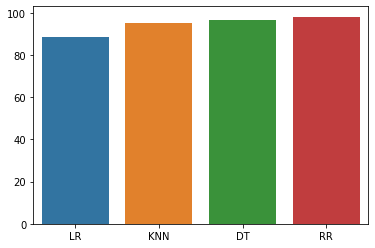

In [65]:
sns.barplot(mm['MODELS'],mm['ACCURACY'])

In [67]:
from sklearn.metrics import mean_absolute_error
print("RandomForestRegressor with Accuracy 0.9810273958583129")
print("MSE =",mean_squared_error(y_test,y_pred4))
print("MAE =",mean_absolute_error(y_test,y_pred4))

RandomForestRegressor with Accuracy 0.9810273958583129
MSE = 303586.89779464813
MAE = 272.8579495786629


In [68]:
import joblib
joblib.dump(rf_model,'DIAMOND PRICE PREDICTION')

NameError: name 'rf_model' is not defined